In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:80% !important;}
"""))

# CNN convolution neural network

(24, 24, 4)


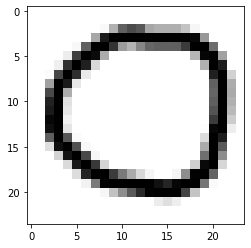

In [2]:
import matplotlib.pyplot as plt
c0 = plt.imread('data/handwriting/handwriting_shape/train/circle/circle001.png')
plt.imshow(c0)
print(c0.shape)

## modeling

In [25]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D #filtering
from tensorflow.keras.layers import MaxPool2D #pooling
from tensorflow.keras.layers import Flatten # lower dimwnsion
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
np.random.seed(3)

In [9]:
#1. 데이터 가져오기
train_datagen = ImageDataGenerator(rescale=1./255)#정규화 작업
train_generator = train_datagen.flow_from_directory(
                                'data/handwriting/hard_handwriting_shape/train',
                                target_size=(24,24),
                                batch_size=3,
                                class_mode="categorical")

test_datagen = ImageDataGenerator(rescale=1./255)#정규화 작업
test_generator = train_datagen.flow_from_directory(
                                'data/handwriting/hard_handwriting_shape/test',
                                target_size=(24,24),
                                batch_size=3,
                                class_mode="categorical")

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [10]:
# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(24,24,3)))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))# 제일 큰 값만 뽑아 이미지 축소
model.add(Flatten())#1차원으로 
model.add(Dense(128, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [11]:
# 3. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# 4. 모델 학습시키기
model.fit_generator(train_generator, steps_per_epoch=15, epochs=50, validation_data=test_generator, validation_steps=5)

C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
15/15 [==============================] - 1s 42ms/step - loss: 1.1741 - accuracy: 0.4039 - val_loss: 1.3010 - val_accuracy: 0.4000
Epoch 2/50
15/15 [==============================] - 0s 14ms/step - loss: 0.2392 - accuracy: 0.9512 - val_loss: 3.0522 - val_accuracy: 0.3333
Epoch 3/50
15/15 [==============================] - 0s 14ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 4.8798 - val_accuracy: 0.3333
Epoch 4/50
15/15 [==============================] - 0s 14ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 5.5584 - val_accuracy: 0.3333
Epoch 5/50
15/15 [==============================] - 0s 14ms/step - loss: 9.8534e-04 - accuracy: 1.0000 - val_loss: 5.8704 - val_accuracy: 0.3333
Epoch 6/50
15/15 [==============================] - 0s 14ms/step - loss: 7.2783e-04 - accuracy: 1.0000 - val_loss: 5.9958 - val_accuracy: 0.3333
Epoch 7/50
15/15 [==============================] - 0s 14ms/step - loss: 4.8931e-04 - accuracy: 1.0000 - val_loss: 6.1391 - val_accuracy: 0.3333
E

In [14]:
#5. 모델 평가하기
score = model.evaluate_generator(test_generator, steps=5)
print(score[0], score[1])

7.130406856536865 0.3333333432674408


In [19]:
#6. 예측하기
pred = model.predict_generator(test_generator)
print(test_generator.class_indices)
np.set_printoptions(formatter={'float':lambda x: "{:0.2f}".format(x)})
print(pred)

{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [0.83 0.01 0.17]
 [0.00 0.02 0.98]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [0.40 0.00 0.60]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]]


C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


## increase accuracy 
- 데이터 확보, 데이터 부풀리기
- 레이어 층

In [31]:
#1. 데이터 가져오기
train_datagen = ImageDataGenerator(rescale =1./255,
                        rotation_range=10,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        shear_range=0.7,#0.7 라이안 밀림
                        zoom_range=[0.9,2.2], # 0.9 배 ~2.2 배
                        horizontal_flip=True, # 수평방향으로 뒤집기
                        vertical_flip=True, # 수직방향으로 뒤집기
                        fill_mode='nearest')#이미지를 회전,이동하거나 축소할 때 공간을 채우는 방식
train_generator = train_datagen.flow_from_directory(
                                'data/handwriting/hand_test/train',
                                target_size=(24,24),
                                batch_size=3,
                                class_mode="categorical")
test_generator = train_datagen.flow_from_directory(
                                'data/handwriting/hand_test/test',
                                target_size=(24,24),
                                batch_size=3,
                                class_mode="categorical")
# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(24,24,3)))
model.add(Conv2D(32, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))# 제일 큰 값만 뽑아 이미지 축소
model.add(Dropout(0.1))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Flatten())#1차원으로 
model.add(Dense(128, activation="relu"))
model.add(Dense(3, activation="softmax"))
# 3. 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
# 4. 모델 학습시키기
model.fit_generator(train_generator, steps_per_epoch=15, epochs=50, validation_data=test_generator, validation_steps=5)

Found 69 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Epoch 1/50
15/15 [==============================] - 1s 40ms/step - loss: 1.1525 - accuracy: 0.4878 - val_loss: 1.1050 - val_accuracy: 0.3333
Epoch 2/50
15/15 [==============================] - 0s 10ms/step - loss: 1.1175 - accuracy: 0.3364 - val_loss: 1.0999 - val_accuracy: 0.3333
Epoch 3/50
15/15 [==============================] - 0s 10ms/step - loss: 1.1003 - accuracy: 0.3261 - val_loss: 1.0968 - val_accuracy: 0.4000
Epoch 4/50
15/15 [==============================] - 0s 10ms/step - loss: 1.0876 - accuracy: 0.3694 - val_loss: 1.0944 - val_accuracy: 0.4000
Epoch 5/50
15/15 [==============================] - 0s 10ms/step - loss: 1.0851 - accuracy: 0.4512 - val_loss: 1.0874 - val_accuracy: 0.3333
Epoch 6/50
15/15 [==============================] - 0s 10ms/step - loss: 1.0735 - accuracy: 0.4541 - val_loss: 1.1465 - val_accuracy: 0.3333
Epoch 7/50
15/15 [==============================] - 0s 10ms/step - loss: 1

In [32]:
#5. 모델 평가하기
score = model.evaluate_generator(test_generator, steps=5)
print(score[0], score[1])
#6. 예측하기
pred = model.predict_generator(test_generator)
print(test_generator.class_indices)
np.set_printoptions(formatter={'float':lambda x: "{:0.2f}".format(x)})
print(pred)

1.5020110607147217 0.6000000238418579
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.27 0.00 0.73]
 [0.25 0.01 0.74]
 [0.56 0.00 0.44]
 [0.00 0.00 1.00]
 [0.03 0.00 0.97]
 [0.08 0.00 0.92]
 [0.28 0.01 0.71]
 [0.01 0.00 0.99]
 [0.38 0.06 0.56]
 [0.20 0.77 0.03]
 [0.59 0.14 0.27]
 [0.73 0.01 0.26]
 [0.57 0.00 0.43]
 [0.70 0.24 0.07]
 [0.36 0.00 0.64]]
